In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/staircase dataset.zip" -d "/content/staircase_dataset"

Archive:  /content/drive/MyDrive/staircase dataset.zip
   creating: /content/staircase_dataset/StaircaseDetection/images/
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1_a1.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1_a2.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1_a3.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1_a4.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_1_a5.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_2.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_2_a1.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_2_a2.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_2_a3.jpg  
  inflating: /content/staircase_dataset/StaircaseDetection/images/1_2_a4.jpg  
  inflating: /c

In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [5]:
!pip install torchvision --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [6]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-_ouxur2j
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-_ouxur2j
  Resolved https://github.com/facebookresearch/detectron2.git to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.3 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6352520 sha256=bdf9270768f35acd04a3bb41f831d374eb6f2a59db156d9241cd6953b681206e
  Stored in directory: /tmp/pip-ephem-wheel-cache-u2lpzwh8/wheels/d3/6e/bd/1969578f1456a6be2

In [9]:
pip install opencv-python-headless pycocotools

In [7]:
import os

dataset_path = "/content/staircase_dataset/StaircaseDetection"
print("Files in dataset folder:")
print(os.listdir(dataset_path))

Files in dataset folder:
['train.txt', 'labels', 'val.txt', 'images']


In [12]:
images_dir  = "/content/staircase_dataset/StaircaseDetection/images"
labels_dir = "/content/staircase_dataset/StaircaseDetection/labels"
train_list = "/content/staircase_dataset/StaircaseDetection/train.txt"
test_list = "/content/staircase_dataset/StaircaseDetection/val.txt"

In [11]:
import os
image_dir = "/content/staircase_dataset/StaircaseDetection/images"
output_txt = "/content/staircase_dataset/StaircaseDetection/train.txt"

#list all image files (you can filter by extension if needed)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# write to train.txt
with open(output_txt, "w") as f:
    for img in image_files:
        f.write(img + "\n")

print(f"Regenerated train.txt with {len(image_files)} entries.")

Regenerated train.txt with 444 entries.


In [13]:
import os
image_dir = "/content/staircase_dataset/StaircaseDetection/images"
output_txt = "/content/staircase_dataset/StaircaseDetection/val.txt"

#list all image files (you can filter by extension if needed)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# write to val.txt
with open(output_txt, "w") as f:
    for img in image_files:
        f.write(img + "\n")

print(f"Regenerated val.txt with {len(image_files)} entries.")

Regenerated val.txt with 444 entries.


In [14]:
import os
import json
from PIL import Image

def convert_yolo_to_coco(txt_path, image_dir, label_dir, output_json, category_name="staircase", start_image_id=0, start_ann_id=0):
    with open(txt_path, "r") as f:
        image_files = [line.strip() for line in f.readlines()]

    coco = {
        "images": [],
        "annotations": [],
        "categories": [{"id": 1, "name": category_name}]
    }

    image_id = start_image_id
    ann_id = start_ann_id

    for img_name in image_files:
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")

        # check if label exists
        if not os.path.exists(label_path):
            continue

        try:
            width, height = Image.open(img_path).size
        except:
            continue

        # add image info
        coco["images"].append({
            "id": image_id,
            "file_name": img_path,
            "width": width,
            "height": height
        })

        # read annotations
        with open(label_path, "r") as lf:
            for line in lf:
                parts = line.strip().split()
                if len(parts) != 5:   # cls, x_center, y_center, w, h
                    continue

                cls, x_center, y_center, w, h = map(float, parts)
                x = (x_center - w / 2) * width
                y = (y_center - h / 2) * height
                bbox_w = w * width
                bbox_h = h * height

                coco["annotations"].append({
                    "id": ann_id,
                    "image_id": image_id,
                    "category_id": int(cls) + 1,
                    "bbox": [x, y, bbox_w, bbox_h],
                    "area": bbox_w * bbox_h,
                    "iscrowd": 0
                })
                ann_id += 1

        image_id += 1

    # save json
    with open(output_json, "w") as out_file:
        json.dump(coco, out_file)

    print(f"✅ Saved COCO annotations to: {output_json}")

In [18]:
#Train set
convert_yolo_to_coco(
    txt_path="/content/staircase_dataset/StaircaseDetection/train.txt",
    image_dir= "/content/staircase_dataset/StaircaseDetection/images",
    label_dir= "/content/staircase_dataset/StaircaseDetection/labels",
    output_json="/content/staircase_dataset/StaircaseDetection/train_coco.json",
)

#validation set
convert_yolo_to_coco(
     txt_path= "/content/staircase_dataset/StaircaseDetection/val.txt",
     image_dir  = "/content/staircase_dataset/StaircaseDetection/images",
     label_dir = "/content/staircase_dataset/StaircaseDetection/labels",
     output_json="/content/staircase_dataset/StaircaseDetection/val_coco.json",
     start_image_id=10000,
     start_ann_id=100000
)

✅ Saved COCO annotations to: /content/staircase_dataset/StaircaseDetection/train_coco.json
✅ Saved COCO annotations to: /content/staircase_dataset/StaircaseDetection/val_coco.json


In [21]:
import json

with open("/content/staircase_dataset/StaircaseDetection/train_coco.json") as f:
  data = json.load(f)

print("Sample image path:", data["images"][0]["file_name"])

Sample image path: /content/staircase_dataset/StaircaseDetection/images/9_a4.jpg


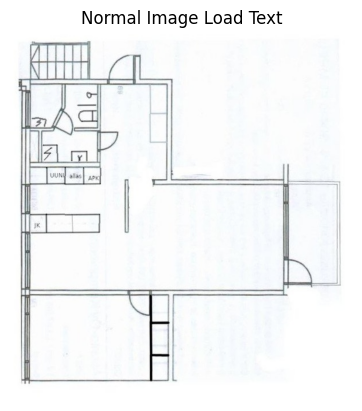

In [22]:
import cv2
import matplotlib.pyplot as plt

img_path = data["images"][0]["file_name"]
img = cv2.imread(img_path)

if img is None:
  print(" Image not found or unreadable.")
else:
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Normal Image Load Text")
  plt.show()

In [23]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances(
    "staircase_train",
    {},
    "/content/staircase_dataset/StaircaseDetection/train_coco.json",
    "/content/staircase_dataset/StaircaseDetection/images"
)
register_coco_instances(
    "staircase_val",
    {},
    "/content/staircase_dataset/StaircaseDetection/val_coco.json",
    "/content/staircase_dataset/StaircaseDetection/images"
)

In [25]:
from detectron2.data import DatasetCatalog

print("Registered datasets:", DatasetCatalog.list())

Registered datasets: ['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco_2017_val_panoptic_stuffonly', 'coco_2017_val_panoptic', 'coco_2017_val_100_panoptic_separated', 'coco_2017_val_100_panoptic_stuffonly', 'coco_2017_val_100_panoptic', 'lvis_v1_train', 'lvis_v1_val', 'lvis_v1_test_dev', 'lvis_v1_test_challenge', 'lvis_v0.5_train', 'lvis_v0.5_val', 'lvis_v0.5_val_rand_100', 'lvis_v0.5_test', 'lvis_v0.5_train_cocofied', 'lvis_v0.5_val_cocofied', 'cityscapes_fine_instance_seg_train', 'cityscapes_fine_sem

In [28]:
from detectron2.data import DatasetCatalog

train_samples = DatasetCatalog.get("staircase_train")
print("Number of training samples:", len(train_samples))
print("Sample_keys:", train_samples[0].keys())
print("Image path:", train_samples[0]["file_name"])

Number of training samples: 444
Sample_keys: dict_keys(['file_name', 'height', 'width', 'image_id', 'annotations'])
Image path: /content/staircase_dataset/StaircaseDetection/images/9_a4.jpg


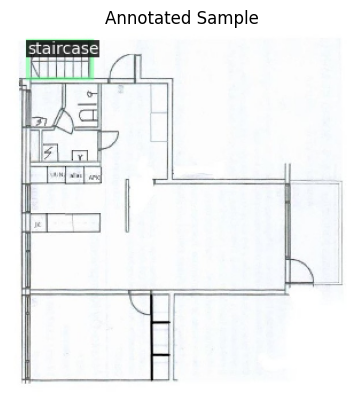

In [29]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

metadata = MetadataCatalog.get("staircase_train")
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(train_samples[0])

plt.imshow(vis.get_image())
plt.axis("off")
plt.title("Annotated Sample")
plt.show()

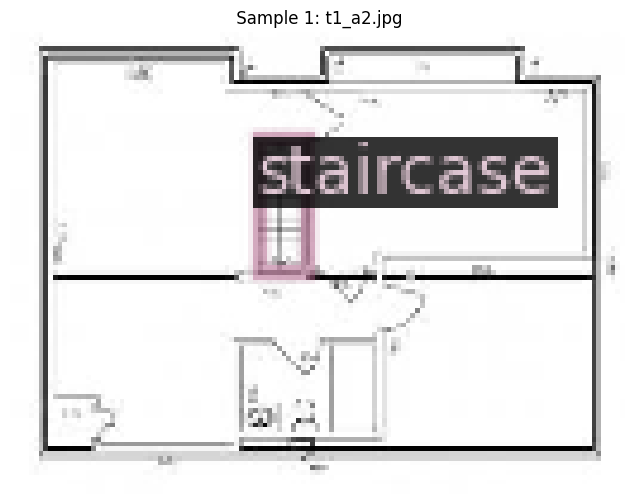

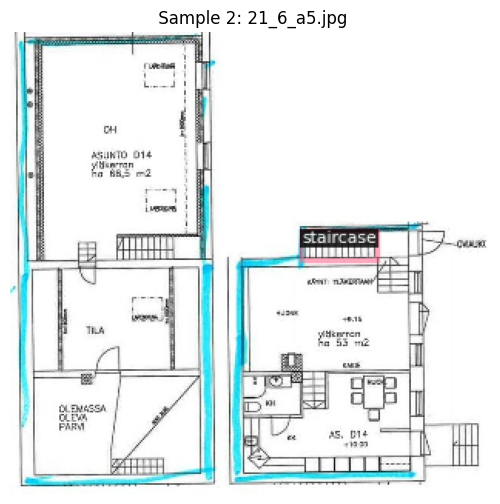

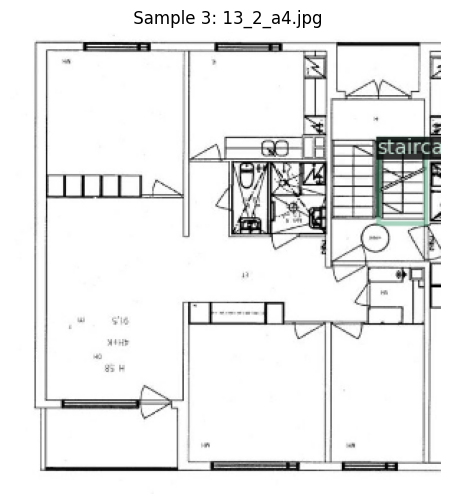

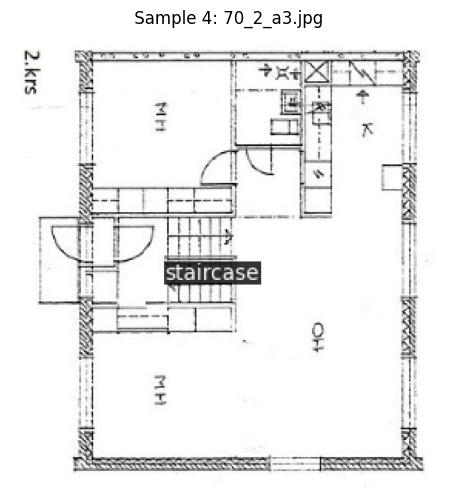

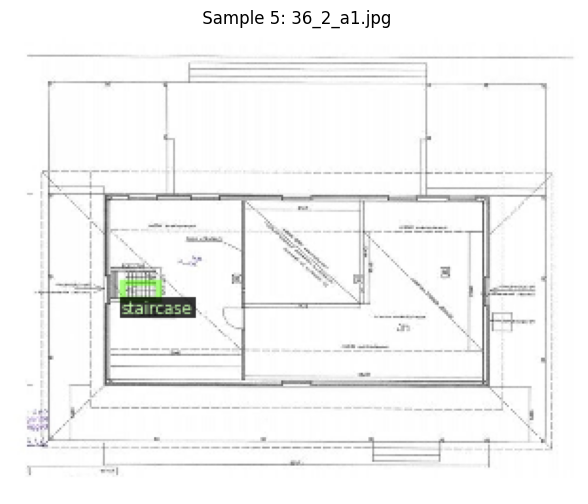

In [30]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

# Load dataset and metadata
samples = DatasetCatalog.get("staircase_train")
metadata = MetadataCatalog.get("staircase_train")

# Shuffle and select N samples
N = 5   # you can change this number if needed
random_samples = random.sample(samples, min(N, len(samples)))

# Visualize each sample
for i, sample in enumerate(random_samples):
    img = cv2.imread(sample["file_name"])
    if img is None:
        print(f" Sample {i+1}: Image not found at {sample['file_name']}")
        continue

    # Draw annotations
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)

    plt.figure(figsize=(8, 6))
    plt.imshow(vis.get_image())
    plt.axis("off")
    plt.title(f" Sample {i+1}: {sample['file_name'].split('/')[-1]}")
    plt.show()

In [32]:
# Create configs folder
!mkdir -p configs/COCO-Detection

# Download Faster R-CNN config
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml -P configs/COCO-Detection/

--2025-09-17 06:04:14--  https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193 [text/plain]
Saving to: ‘configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml’

faster_rcnn_R_50_FP 100%[===================>]     193  --.-KB/s    in 0s      

2025-09-17 06:04:14 (4.09 MB/s) - ‘configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml’ saved [193/193]



In [33]:
import torch

# Download Faster R-CNN weights from Torchvision
torch.hub.download_url_to_file(
    'https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth',
    'fasterrcnn_resnet50_fpn_coco.pth'
)

100%|██████████| 160M/160M [00:01<00:00, 141MB/s]


In [35]:
!mkdir -p configs

!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml -P configs/

--2025-09-17 06:05:34--  https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318 (1.3K) [text/plain]
Saving to: ‘configs/Base-RCNN-FPN.yaml’

Base-RCNN-FPN.yaml  100%[===================>]   1.29K  --.-KB/s    in 0s      

2025-09-17 06:05:34 (70.5 MB/s) - ‘configs/Base-RCNN-FPN.yaml’ saved [1318/1318]



In [38]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("staircase_train",)
cfg.DATASETS.TEST = ("staircase_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 12000
cfg.SOLVER.STEPS = []  # No LR decay
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Only staircase
cfg.SOLVER.CHECKPOINT_PERIOD = 300

cfg.OUTPUT_DIR = "/content/drive/MyDrive/staircase_frcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.DEVICE = "cpu"

#resume from last checkpoint if available
last_checkpoint = os.path.join(cfg.OUTPUT_DIR, "last_checkpoint")
if os.path.exists(last_checkpoint):
    with open(last_checkpoint, "r") as f:
         last_model = f.read().strip()
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, last_model)
    cfg.resume = True
else:
  print(" No checkpoint found - starting fresh.")
  cfg.resume = False

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[09/17 06:22:21 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [43]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/staircase_frcnn/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2

predictor = DefaultPredictor(cfg)

[09/17 07:26:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/staircase_frcnn/model_final.pth ...


[09/17 07:33:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/staircase_frcnn/model_final.pth ...
[09/17 07:33:56 d2.data.datasets.coco]: Loaded 444 images in COCO format from /content/staircase_dataset/StaircaseDetection/val_coco.json


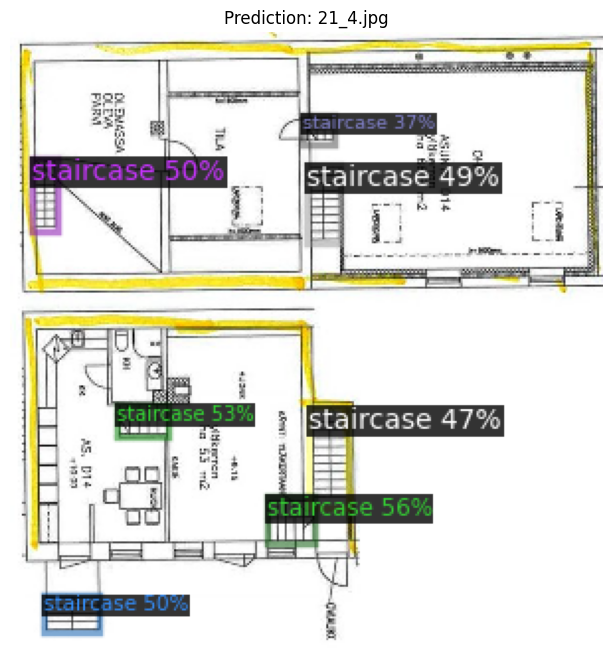

In [49]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Load trained weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,"/content/drive/MyDrive/staircase_frcnn/model_final.pth" )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
predictor = DefaultPredictor(cfg)

# Access registered validation dataset
dataset_dicts = DatasetCatalog.get("staircase_val") # Use your actual registered name
metadata = MetadataCatalog.get("staircase_val")

# Pick a random sample
sample = random.choice(dataset_dicts)
image_path = sample['file_name']
image = cv2.imread(image_path)

# If image is broken
if image is None:
    raise ValueError(f"Failed to load image: {image_path}")

# Run inference
outputs = predictor(image)

# Visualize predictions
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display
plt.figure(figsize=(10, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.title(f"Prediction: {image_path.split('/')[-1]}")
plt.show()

In [60]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create evaluator for your registered validation dataset
# Adjust the evaluator to the correct output path
evaluator = COCOEvaluator("staircase_val", cfg, False, output_dir="./output/")

# Build validation dataloader
val_loader = build_detection_test_loader(cfg, "staircase_val")

# Run evaluation
results = inference_on_dataset(predictor.model, val_loader, evaluator)

# Print results
print("Evaluation Results:")
for metric, value in results.items():
    print(f"  {metric}: {value}")

WARNING [09/17 08:49:10 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/17 08:49:10 d2.data.datasets.coco]: Loaded 444 images in COCO format from /content/staircase_dataset/StaircaseDetection/val_coco_patched.json
[09/17 08:49:10 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/17 08:49:10 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/17 08:49:10 d2.data.common]: Serializing 444 elements to byte tensors and concatenating them all ...
[09/17 08:49:10 d2.data.common]: Serialized dataset takes 0.12 MiB
[09/17 08:49:10 d2.evaluation.evaluator]: Start inference on 444 batches


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[09/17 08:49:20 d2.evaluation.evaluator]: Inference done 1/444. Dataloading: 0.9477 s/iter. Inference: 8.2430 s/iter. Eval: 0.0005 s/iter. Total: 9.1934 s/iter. ETA=1:07:52
[09/17 08:49:32 d2.evaluation.evaluator]: Inference done 2/444. Dataloading: 0.4758 s/iter. Inference: 10.2440 s/iter. Eval: 0.0004 s/iter. Total: 10.7225 s/iter. ETA=1:18:59
[09/17 08:49:39 d2.evaluation.evaluator]: Inference done 3/444. Dataloading: 0.3175 s/iter. Inference: 9.1758 s/iter. Eval: 0.0004 s/iter. Total: 9.4957 s/iter. ETA=1:09:47
[09/17 08:49:47 d2.evaluation.evaluator]: Inference done 4/444. Dataloading: 0.2389 s/iter. Inference: 8.8842 s/iter. Eval: 0.0004 s/iter. Total: 9.1253 s/iter. ETA=1:06:55
[09/17 08:49:54 d2.evaluation.evaluator]: Inference done 5/444. Dataloading: 0.1919 s/iter. Inference: 8.6219 s/iter. Eval: 0.0004 s/iter. Total: 8.8160 s/iter. ETA=1:04:30
[09/17 08:50:02 d2.evaluation.evaluator]: Inference done 6/444. Dataloading: 0.0000 s/iter. Inference: 7.8529 s/iter. Eval: 0.0003 s/

In [55]:
import json

# Load original val.json
with open("/content/staircase_dataset/StaircaseDetection/val_coco.json", "r") as f:
    val_data = json.load(f)

# Patch 'info' if missing
if "info" not in val_data:
    val_data["info"] = {
        "description": "Staircase detection validation set",
        "version": "1.0",
        "year": 2025
    }

# Save patched file
with open("/content/staircase_dataset/StaircaseDetection/val_coco_patched.json", "w") as f:
    json.dump(val_data, f)

In [58]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

def register_dataset_if_not_exists(name, metadata, json_file, image_root):
    if name in DatasetCatalog.list():
        print(f"Dataset '{name}' already registered. Removing and re-registering.")
        DatasetCatalog.remove(name)
        # Also remove from MetadataCatalog
        if name in MetadataCatalog.list():
            MetadataCatalog.remove(name)
    register_coco_instances(name, metadata, json_file, image_root)
    print(f"Dataset '{name}' registered successfully.")


# Register the patched validation dataset
register_dataset_if_not_exists(
    "staircase_val",
    {},
    "/content/staircase_dataset/StaircaseDetection/val_coco_patched.json",
    "/content/staircase_dataset/StaircaseDetection/images"
)

# You might also want to re-register the training set with the helper function for consistency
# register_dataset_if_not_exists(
#     "staircase_train",
#     {},
#     "/content/staircase_dataset/StaircaseDetection/train_coco.json",
#     "/content/staircase_dataset/StaircaseDetection/images"
# )

Dataset 'staircase_val' already registered. Removing and re-registering.
Dataset 'staircase_val' registered successfully.
